<a href="https://colab.research.google.com/github/yadukrishnanp2001/MNIST---Digit-Recognition/blob/main/Digit_Recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2                        # computer vision
import numpy as np                # numpy arrays
import pandas as pd
import matplotlib.pyplot as plt   # visualization
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
mnist = tf.keras.datasets.mnist   # download dataset from tensorflow # already splits into traning data and testing data
(x_train,y_train),(x_test,y_test) = mnist.load_data()  #  It consists of a set of 28x28 pixel grayscale images of handwritten digits (0 through 9) and their corresponding labels. The MNIST dataset is commonly used as a benchmark in the field of machine learning to evaluate and compare the performance of different algorithms, especially in the context of image classification.

x_train = tf.keras.utils.normalize(x_train, axis=1)     # noemalizing-scaling between 0-1
x_test = tf.keras.utils.normalize(x_test, axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape, y_train[0].shape

((28, 28), ())

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven','eight','nine']

In [ ]:
len(class_names)

10

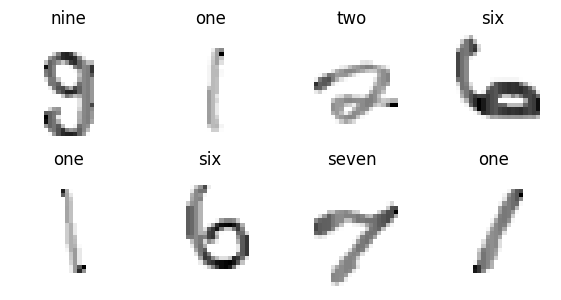

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(8):
    ax = plt.subplot(4, 4, i+1)
    rand_index = random.choice(range(len(x_train)))
    plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_index]])
    plt.axis(False)

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [ ]:
# create a model

model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))


Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2579 - accuracy: 0.9250 - val_loss: 0.1284 - val_accuracy: 0.9623
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.1185 - val_accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.0990 - val_accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0941 - val_accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0921 - val_accuracy: 0.9728


<Axes: >

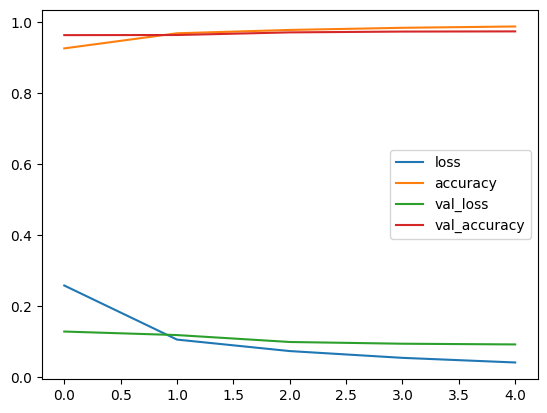

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# evaluate the model
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9893


[0.03434509411454201, 0.9892833232879639]

In [ ]:
y_probs = model.predict(x_test)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.36385769e-10, 2.62524580e-08, 5.81617542e-06, 1.01591968e-05,
        7.28456045e-11, 1.04648175e-08, 6.34788242e-14, 9.99983907e-01,
        3.55568552e-08, 6.80726586e-08],
       [3.46295428e-14, 6.65746211e-06, 9.99993205e-01, 1.54185074e-07,
        1.41387336e-12, 7.73942299e-10, 4.38302639e-09, 3.28375695e-12,
        2.29291750e-08, 1.21139711e-13],
       [1.50755710e-08, 9.99834776e-01, 3.71364240e-06, 3.28043620e-06,
        3.74550382e-06, 6.67895222e-07, 2.68400356e-07, 1.46417791e-04,
        6.86342810e-06, 2.10997783e-07],
       [9.99359667e-01, 1.04636626e-06, 2.90735643e-05, 1.13210194e-06,
        9.22249365e-06, 3.04395417e-06, 8.73278077e-06, 7.85803422e-05,
        2.06582126e-06, 5.07329358e-04],
       [1.11552126e-05, 4.97969097e-07, 4.86839817e-05, 2.57683296e-05,
        8.50284874e-01, 5.23672179e-06, 1.43598627e-05, 1.18339976e-05,
        4.27492960e-05, 1.49554834e-01]], dtype=float32)

In [ ]:
y_pred = y_probs.argmax(axis=1)

y_pred[:5]

array([7, 2, 1, 0, 4])

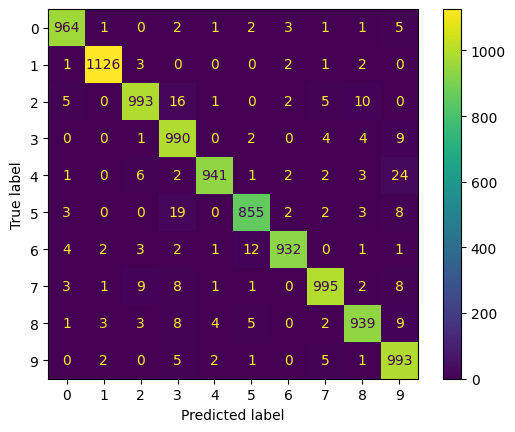

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

        i = random.randint(0, len(images))

        target_image = images[i]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        plt.imshow(target_image, cmap=plt.cm.binary)

        # changing color of the title depending on the prediction right or wrong
        if pred_label == true_label:
            color = 'green'
        else:
            color='red'

        plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)

1/1 [==============================] - 0s 38ms/step


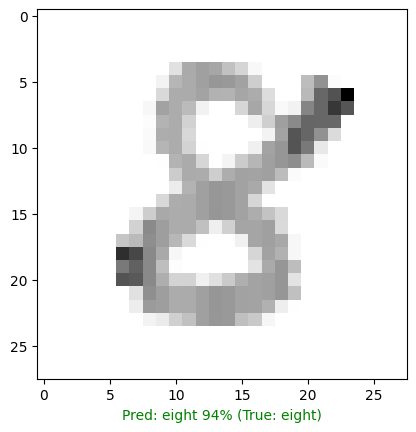

In [ ]:
plot_random_image(model=model, images=x_test, true_labels=y_test, classes=class_names)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


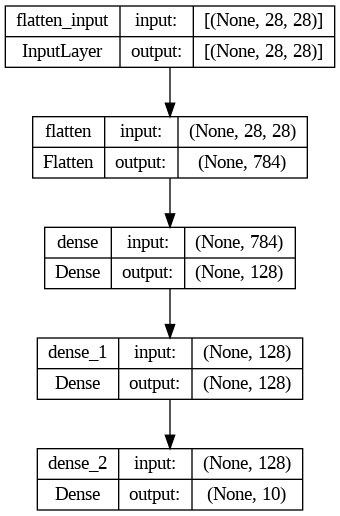

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)